<a href="https://colab.research.google.com/github/shloak17107/airline-delay-prediction/blob/Data-Preprocessing/CMPE_257_Airline_Delays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub -q


import kagglehub
import pandas as pd
import os

print("Downloading dataset...")
dataset_path = kagglehub.dataset_download('sherrytp/airline-delay-analysis')
print(f"Dataset downloaded to: {dataset_path}")

100%|██████████| 2.19G/2.19G [00:21<00:00, 110MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/sherrytp/airline-delay-analysis/versions/2
Attempting to load: /root/.cache/kagglehub/datasets/sherrytp/airline-delay-analysis/versions/2/Airline Delay Analysis.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
!ls -lh "$dataset_path"

total 4.0K
drwxr-xr-x 2 root root 4.0K Apr 29 15:04 'airline delay analysis'


In [ ]:
!ls -lh "$dataset_path/airline delay analysis/"

total 8.2G
-rw-r--r-- 1 root root 756M Apr 29 15:03 2009.csv
-rw-r--r-- 1 root root 758M Apr 29 15:03 2010.csv
-rw-r--r-- 1 root root 713M Apr 29 15:03 2011.csv
-rw-r--r-- 1 root root 740M Apr 29 15:03 2012.csv
-rw-r--r-- 1 root root 751M Apr 29 15:03 2013.csv
-rw-r--r-- 1 root root 687M Apr 29 15:03 2014.csv
-rw-r--r-- 1 root root 686M Apr 29 15:04 2015.csv
-rw-r--r-- 1 root root 663M Apr 29 15:04 2016.csv
-rw-r--r-- 1 root root 670M Apr 29 15:04 2017.csv
-rw-r--r-- 1 root root 852M Apr 29 15:04 2018.csv
-rw-r--r-- 1 root root 772M Apr 29 15:04 2019.csv
-rw-r--r-- 1 root root 255M Apr 29 15:03 20.csv


In [ ]:
# Understanding the dataset

data_directory = dataset_path + "/airline delay analysis/"
file = "2019.csv"
full_path = os.path.join(data_directory, file)
print(f"Attempting to load: {full_path}")


Attempting to load: /root/.cache/kagglehub/datasets/sherrytp/airline-delay-analysis/versions/2/airline delay analysis/2019.csv


In [ ]:
df_raw = pd.read_csv(full_path, low_memory=False)
print(f"Shape (rows, columns): {df_raw.shape}")

Shape (rows, columns): (7422037, 21)


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422037 entries, 0 to 7422036
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_UNIQUE_CARRIER    object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   DEP_TIME             float64
 6   DEP_DELAY            float64
 7   TAXI_OUT             float64
 8   WHEELS_OFF           float64
 9   WHEELS_ON            float64
 10  TAXI_IN              float64
 11  ARR_TIME             float64
 12  ARR_DELAY            float64
 13  AIR_TIME             float64
 14  DISTANCE             float64
 15  CARRIER_DELAY        float64
 16  WEATHER_DELAY        float64
 17  NAS_DELAY            float64
 18  SECURITY_DELAY       float64
 19  LATE_AIRCRAFT_DELAY  float64
 20  Unnamed: 20          float64
dtypes: float64(16), int64(1), object(4)
memory usage: 1.2+ GB


In [ ]:
print("First 5 Rows (Head):")
df_raw.head()

First 5 Rows (Head):


,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,...,ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 20
0,2019-01-01,9E,3280,GNV,ATL,601.0,1.0,22.0,623.0,714.0,...,722.0,-1.0,51.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,9E,3281,MSP,CVG,1359.0,-5.0,15.0,1414.0,1629.0,...,1633.0,-36.0,75.0,596.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,9E,3282,DTW,CVG,1215.0,-5.0,18.0,1233.0,1323.0,...,1329.0,-16.0,50.0,229.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,9E,3283,TLH,ATL,1521.0,-6.0,14.0,1535.0,1618.0,...,1625.0,-14.0,43.0,223.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,9E,3284,ATL,FSM,1847.0,-15.0,18.0,1905.0,1935.0,...,1940.0,-25.0,90.0,579.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Summary Statistics for Numerical Columns:")
df_raw.describe()

Summary Statistics for Numerical Columns:


,OP_CARRIER_FL_NUM,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 20
count,7.422037e+06,7.291951e+06,7.291927e+06,7.288060e+06,7.288060e+06,7.284390e+06,7.284390e+06,7.284391e+06,7.268232e+06,7.268232e+06,7.422037e+06,1.389253e+06,1.389253e+06,1.389253e+06,1.389253e+06,1.389253e+06,0.0
mean,2.557196e+03,1.334606e+03,1.092327e+01,1.738935e+01,1.358264e+03,1.459032e+03,7.740776e+00,1.462955e+03,5.414849e+00,1.115734e+02,8.005437e+02,2.112859e+01,3.802404e+00,1.658795e+01,9.608329e-02,2.740748e+01,NaN
std,1.799413e+03,5.071998e+02,4.895964e+01,1.000398e+01,5.088109e+02,5.378414e+02,6.194340e+00,5.424542e+02,5.106666e+01,7.056123e+01,5.925118e+02,6.610465e+01,3.236297e+01,3.966440e+01,3.358346e+00,5.345620e+01,NaN
min,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.900000e+01,4.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,1.025000e+03,9.140000e+02,-5.000000e+00,1.100000e+01,9.300000e+02,1.042000e+03,4.000000e+00,1.046000e+03,-1.500000e+01,6.000000e+01,3.690000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,2.158000e+03,1.327000e+03,-2.000000e+00,1.500000e+01,1.340000e+03,1.500000e+03,6.000000e+00,1.504000e+03,-6.000000e+00,9.300000e+01,6.400000e+02,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,3.000000e+00,NaN
75%,3.917000e+03,1.746000e+03,7.000000e+00,2.000000e+01,1.801000e+03,1.912000e+03,9.000000e+00,1.917000e+03,7.000000e+00,1.410000e+02,1.034000e+03,1.800000e+01,0.000000e+00,2.000000e+01,0.000000e+00,3.300000e+01,NaN
max,7.933000e+03,2.400000e+03,2.710000e+03,2.270000e+02,2.400000e+03,2.400000e+03,3.160000e+02,2.400000e+03,2.695000e+03,1.557000e+03,5.095000e+03,2.695000e+03,1.847000e+03,1.741000e+03,1.078000e+03,2.206000e+03,NaN


In [ ]:
print("Summary Statistics for Object/Categorical Columns:")
df_raw.describe(include=['object', 'category'])

Summary Statistics for Object/Categorical Columns:


,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST
count,7422037,7422037,7422037,7422037
unique,365,17,360,360
top,2019-12-01,WN,ATL,ATL
freq,22784,1363946,395009,395026


In [ ]:
df_raw['ARR_DELAY'].describe()

,ARR_DELAY
count,7.268232e+06
mean,5.414849e+00
std,5.106666e+01
min,-9.900000e+01
25%,-1.500000e+01
50%,-6.000000e+00
75%,7.000000e+00
max,2.695000e+03


Target Variable Analysis (ARR_DELAY):


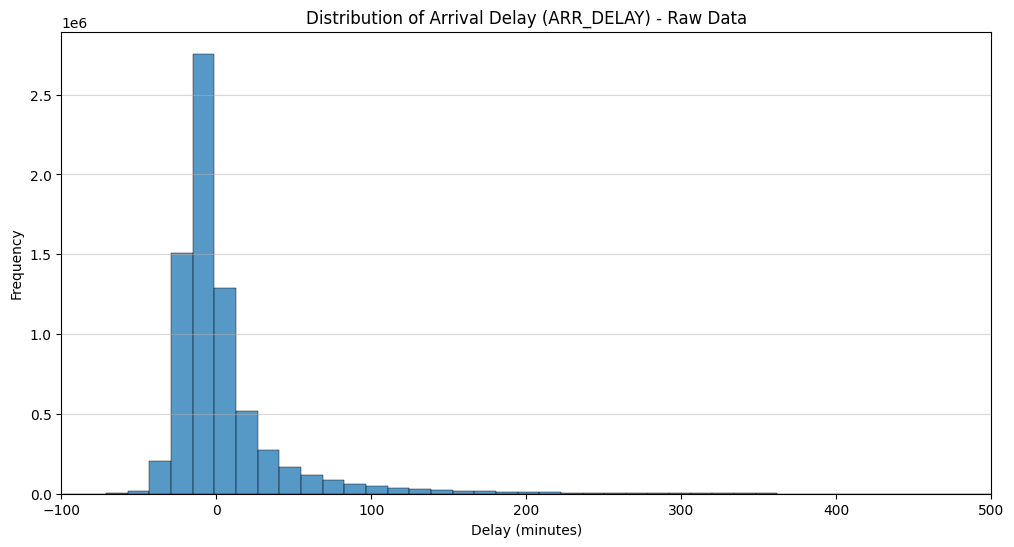

In [ ]:
print("Target Variable Analysis (ARR_DELAY):")
plt.figure(figsize=(12, 6))
sns.histplot(df_raw['ARR_DELAY'].dropna(), bins=200, kde=False) # Use more bins for detail
plt.title('Distribution of Arrival Delay (ARR_DELAY) - Raw Data')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.xlim(-100, 500) # Adjust x-limits to see the bulk of the distribution
plt.grid(axis='y', alpha=0.5)
plt.show()

In [ ]:
print("Missing Values per Column (%):")
missing_percent = (df_raw.isnull().sum() / len(df_raw)) * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

Missing Values per Column (%):
Unnamed: 20            100.000000
LATE_AIRCRAFT_DELAY     81.282052
NAS_DELAY               81.282052
CARRIER_DELAY           81.282052
SECURITY_DELAY          81.282052
WEATHER_DELAY           81.282052
ARR_DELAY                2.072275
AIR_TIME                 2.072275
WHEELS_ON                1.854572
TAXI_IN                  1.854572
ARR_TIME                 1.854558
WHEELS_OFF               1.805124
TAXI_OUT                 1.805124
DEP_DELAY                1.753023
DEP_TIME                 1.752699
dtype: float64


In [ ]:
print("Exploring Key Categorical Features (Examples):")
key_cats = ['OP_CARRIER', 'ORIGIN', 'DEST', 'DAY_OF_WEEK', 'MONTH', 'CANCELLED', 'DIVERTED', 'CANCELLATION_CODE']
for col in key_cats:
    if col in df_raw.columns:
        print(f"\n--- Column: {col} ---")
        print(f"  Number of Unique Values: {df_raw[col].nunique()}")
        print("  Value Counts (Top 10 or All if Few):")
        print(df_raw[col].value_counts(dropna=False).head(10 if df_raw[col].nunique() > 10 else df_raw[col].nunique()))

Exploring Key Categorical Features (Examples):

--- Column: ORIGIN ---
  Number of Unique Values: 360
  Value Counts (Top 10 or All if Few):
ORIGIN
ATL    395009
ORD    339606
DFW    304344
DEN    252026
CLT    235496
LAX    219952
IAH    179688
PHX    175328
LGA    171665
SFO    170918
Name: count, dtype: int64

--- Column: DEST ---
  Number of Unique Values: 360
  Value Counts (Top 10 or All if Few):
DEST
ATL    395026
ORD    339569
DFW    304346
DEN    252064
CLT    235490
LAX    219996
IAH    179682
PHX    175343
LGA    171665
SFO    170966
Name: count, dtype: int64


Correlation Matrix (Numerical Columns):

Correlations with ARR_DELAY:
ARR_DELAY              1.000000
DEP_DELAY              0.963505
CARRIER_DELAY          0.638733
LATE_AIRCRAFT_DELAY    0.482611
WEATHER_DELAY          0.317463
NAS_DELAY              0.295673
TAXI_OUT               0.220687
DEP_TIME               0.124973
WHEELS_OFF             0.120237
TAXI_IN                0.102853
WHEELS_ON              0.030289
ARR_TIME               0.022530
SECURITY_DELAY         0.022206
AIR_TIME               0.011751
DISTANCE              -0.006751
Name: ARR_DELAY, dtype: float64


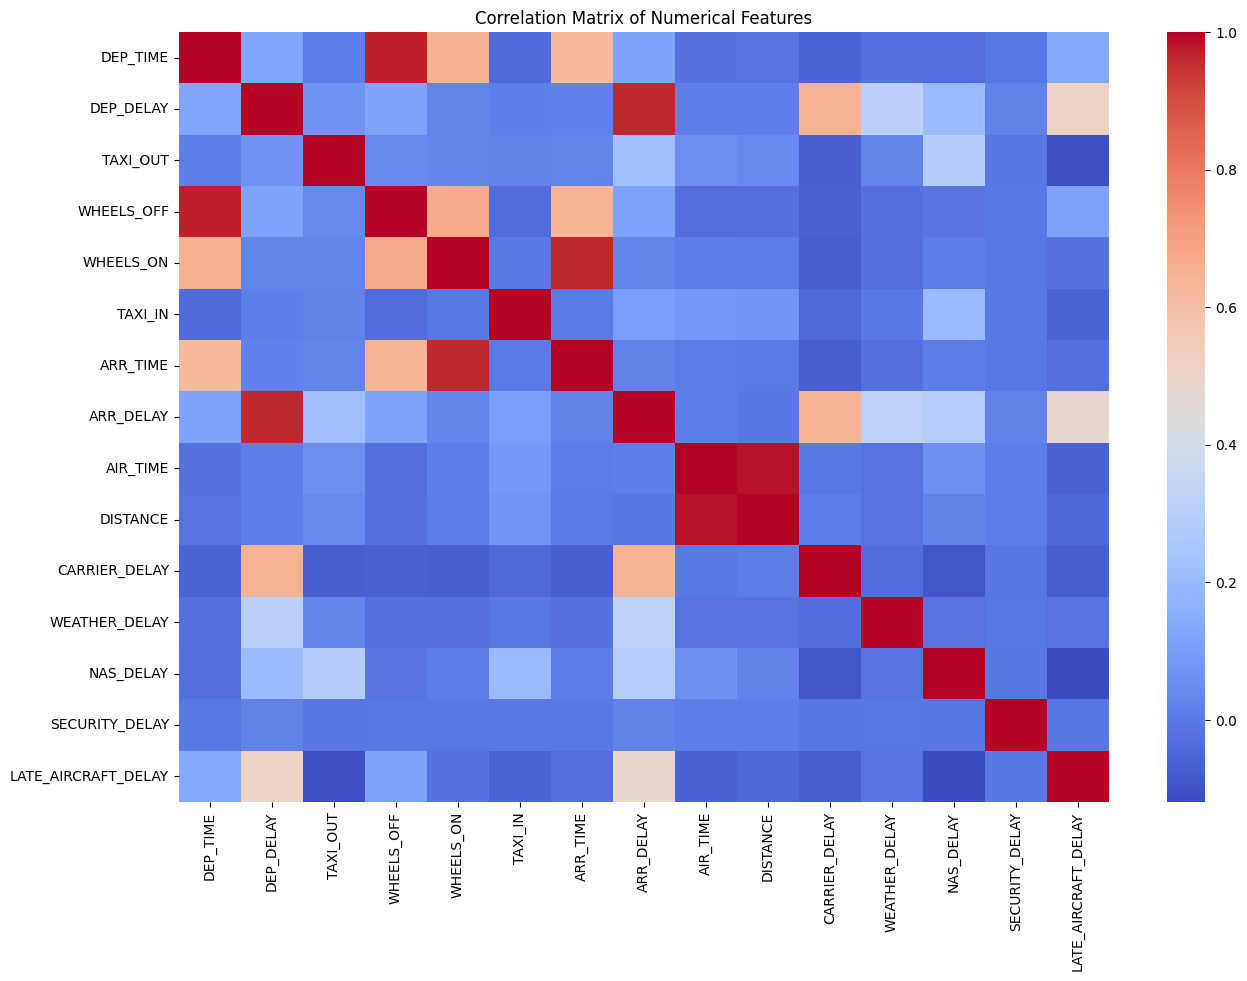

In [ ]:
print("Correlation Matrix (Numerical Columns):")
# Select only numerical columns for correlation calculation
numeric_df = df_raw.select_dtypes(include=np.number)
# Drop columns that are mostly identifiers or sparse indicators if necessary before correlation
cols_to_drop_for_corr = [col for col in ['Unnamed: 20', 'OP_CARRIER_FL_NUM'] if col in numeric_df.columns] # Example
if cols_to_drop_for_corr:
      numeric_df = numeric_df.drop(columns=cols_to_drop_for_corr)

correlation_matrix = numeric_df.corr()

print("\nCorrelations with ARR_DELAY:")
print(correlation_matrix['ARR_DELAY'].sort_values(ascending=False))

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False) # annot=True is too crowded
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Visualizing Relationships (Examples):


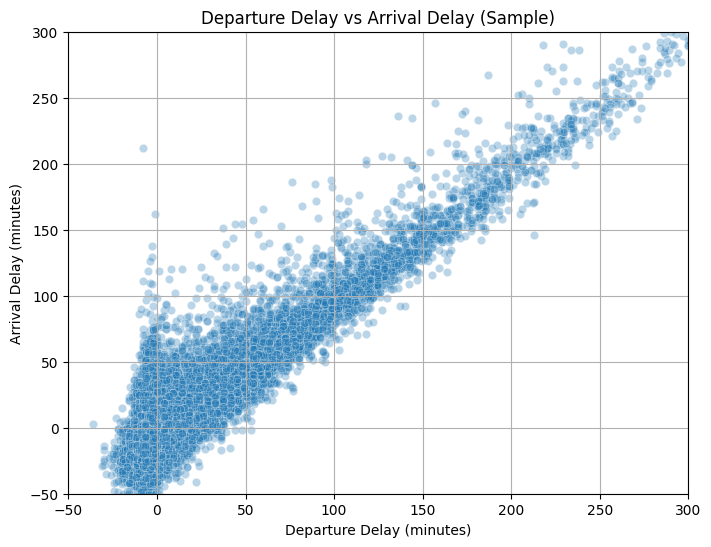

In [ ]:
print("Visualizing Relationships (Examples):")
# Scatter plot: Departure Delay vs Arrival Delay
plt.figure(figsize=(8, 6))
# Sample data to avoid overplotting if the dataset is huge
sample_df = df_raw.sample(n=min(50000, len(df_raw)), random_state=42) # Sample 50k points or less
sns.scatterplot(data=sample_df, x='DEP_DELAY', y='ARR_DELAY', alpha=0.3)
plt.title('Departure Delay vs Arrival Delay (Sample)')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.xlim(-50, 300) # Zoom in on common range
plt.ylim(-50, 300)
plt.grid(True)
plt.show()

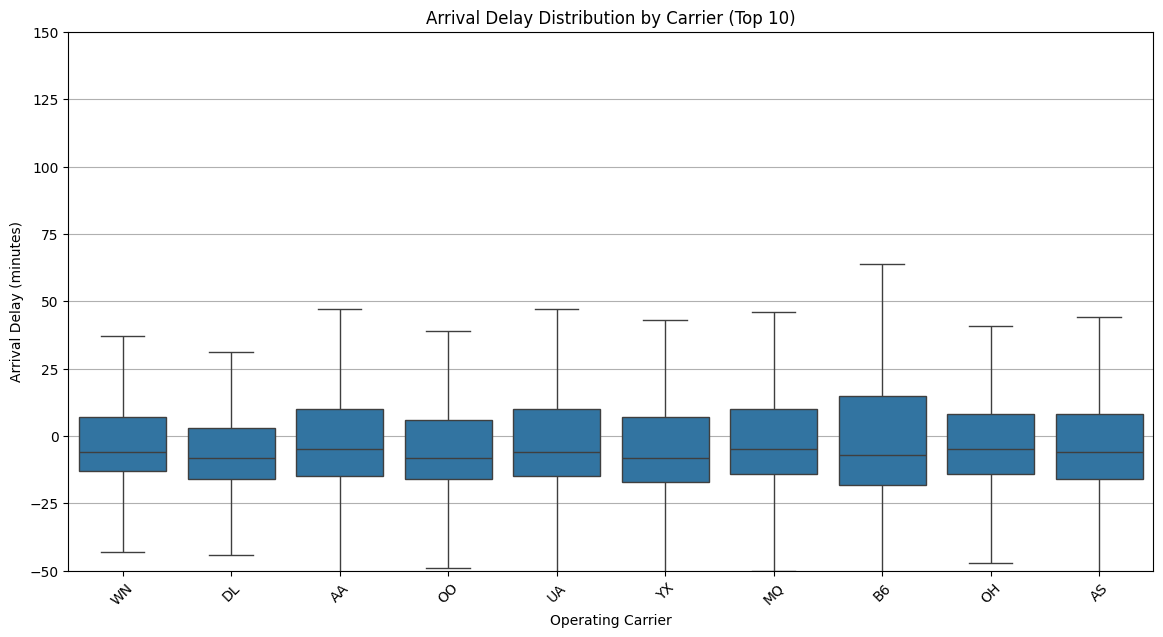

In [ ]:
# Box plot: Arrival Delay by Carrier (Top N Carriers)
if 'OP_UNIQUE_CARRIER' in df_raw.columns:
    top_carriers = df_raw['OP_UNIQUE_CARRIER'].value_counts().nlargest(10).index.tolist()
    plt.figure(figsize=(14, 7))
    sns.boxplot(data=df_raw[df_raw['OP_UNIQUE_CARRIER'].isin(top_carriers)], x='OP_UNIQUE_CARRIER', y='ARR_DELAY', order=top_carriers, showfliers=False)
    plt.title('Arrival Delay Distribution by Carrier (Top 10)')
    plt.xlabel('Operating Carrier')
    plt.ylabel('Arrival Delay (minutes)')
    plt.ylim(-50, 150)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

In [ ]:
# Processing files from 2011 - 2019 due to memory restrictions.
files_to_process = [f'{year}.csv' for year in range(2011, 2020)] # 2011.csv to 2019.csv

print(f"Files to process: {files_to_process}")

Files to process: ['2011.csv', '2012.csv', '2013.csv', '2014.csv', '2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv']


In [1]:
print("Hello World!")

Hello World!
